# Predicting Range of Electric Vehicles Using Linear Regression
### By Alen Sadique P M

Predicting the range of electric vehicles (EVs) using linear regression can be a useful approach to estimate how far an EV can travel on a single charge based on certain input variables. In this context, the range of an EV refers to the distance it can travel before needing to be recharged.

Here, I explore the dataset containing information about electric vehicles (EVs) and create a Regression model with the aim of estimating the range of EVs.

In [1]:
#Importing the Libraries and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load Data

In [3]:
# Import the dataset
ev = pd.read_csv('/content/ElectricCarData_Clean.csv')
ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


# 2.Exploratory Data Analysis

In [4]:
#Columns
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [5]:
#Summary of the data
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [ ]:
#Shape(number of rows and columns)
ev.shape

(103, 14)

In [ ]:
#Null or missing values
ev.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

There is no null value

In [6]:
#Check data type of each column
ev.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [7]:
#Check the unique values of the dataset
ev.nunique()

Brand               33
Model              102
AccelSec            55
TopSpeed_KmH        25
Range_Km            50
Efficiency_WhKm     54
FastCharge_KmH      51
RapidCharge          2
PowerTrain           3
PlugType             4
BodyStyle            9
Segment              8
Seats                5
PriceEuro           87
dtype: int64

In [8]:
#Description of the dataset
ev.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

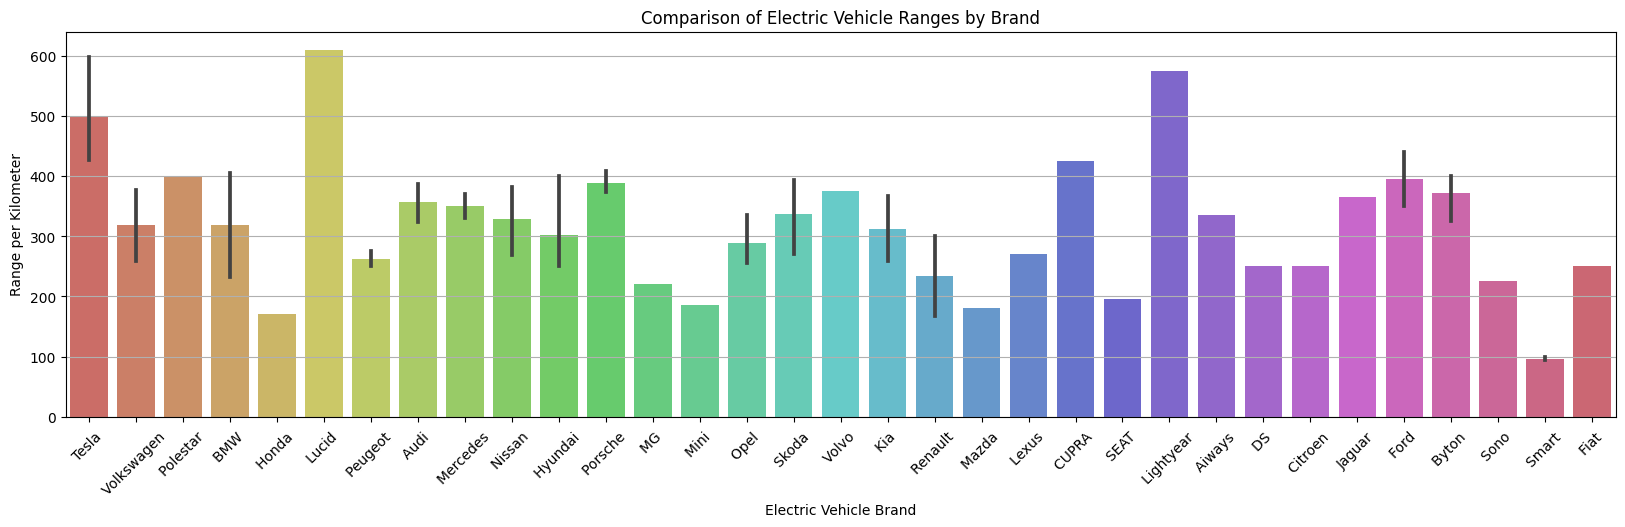

In [9]:
# Evaluating Electric Vehicle Brand's Influence on Acceleration
# Create a figure with specified dimensions
figure = plt.figure(figsize=(20, 5))

# Create a bar plot using seaborn, showing the relationship between Brand and Range_Km using data from 'ev' dataframe, with a chosen color palette
sns.barplot(x='Brand', y='Range_Km', data=ev, palette='hls')

# Add gridlines along the y-axis
plt.grid(axis='y')

# Set the title of the plot
plt.title('Comparison of Electric Vehicle Ranges by Brand')

# Label the x and y axes
plt.xlabel('Electric Vehicle Brand')
plt.ylabel('Range per Kilometer')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


Lightyear, Lucid, and Tesla possess the greatest range, while Smart has the most limited range.


# The model that possesses the greatest distance coverage.

In [10]:
range_df = ev.sort_values(by='Range_Km', ascending=False)
top_model_range = range_df[['Brand', 'Model', 'Range_Km']].head(n=1)
top_model_range

,Brand,Model,Range_Km
51,Tesla,Roadster,970


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

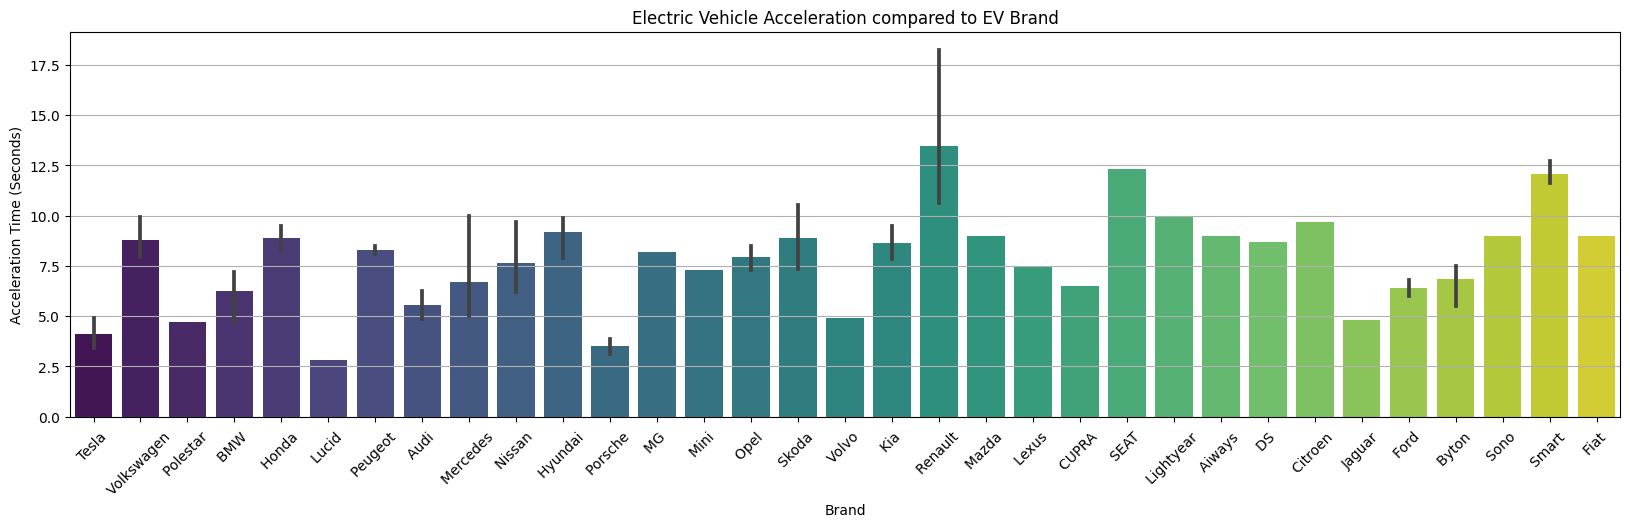

In [11]:
#Evaluating Electric Vehicle Brand's Influence on Acceleration
# Create a plot figure with specific dimensions
figure = plt.figure(figsize=(20, 5))

# Generate a bar plot using seaborn, showcasing the connection between EV brands and acceleration, utilizing data from the 'ev' dataset, and employing a chosen color palette
sns.barplot(x='Brand', y='AccelSec', data=ev, palette='viridis')

# Introduce gridlines along the y-axis
plt.grid(axis='y')

# Specify the title of the plot
plt.title('Electric Vehicle Acceleration compared to EV Brand')

# Label the x and y axes
plt.xlabel('Brand')
plt.ylabel('Acceleration Time (Seconds)')

# Rotate x-axis labels for enhanced clarity
plt.xticks(rotation=45)


Lucid, Tesla, and Porsche secure the top three positions, boasting the ability to accelerate to 60 mph (97 km/h) in a remarkably brief period. Conversely, Renault lags behind, requiring the longest duration for the same acceleration.


# The model with the shortest acceleration duration.

In [12]:
df = ev.sort_values(by='AccelSec', ascending=True)
top_model_acceleration = df[['Brand', 'Model', 'AccelSec']].head(n=1)
top_model_acceleration

,Brand,Model,AccelSec
51,Tesla,Roadster,2.1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

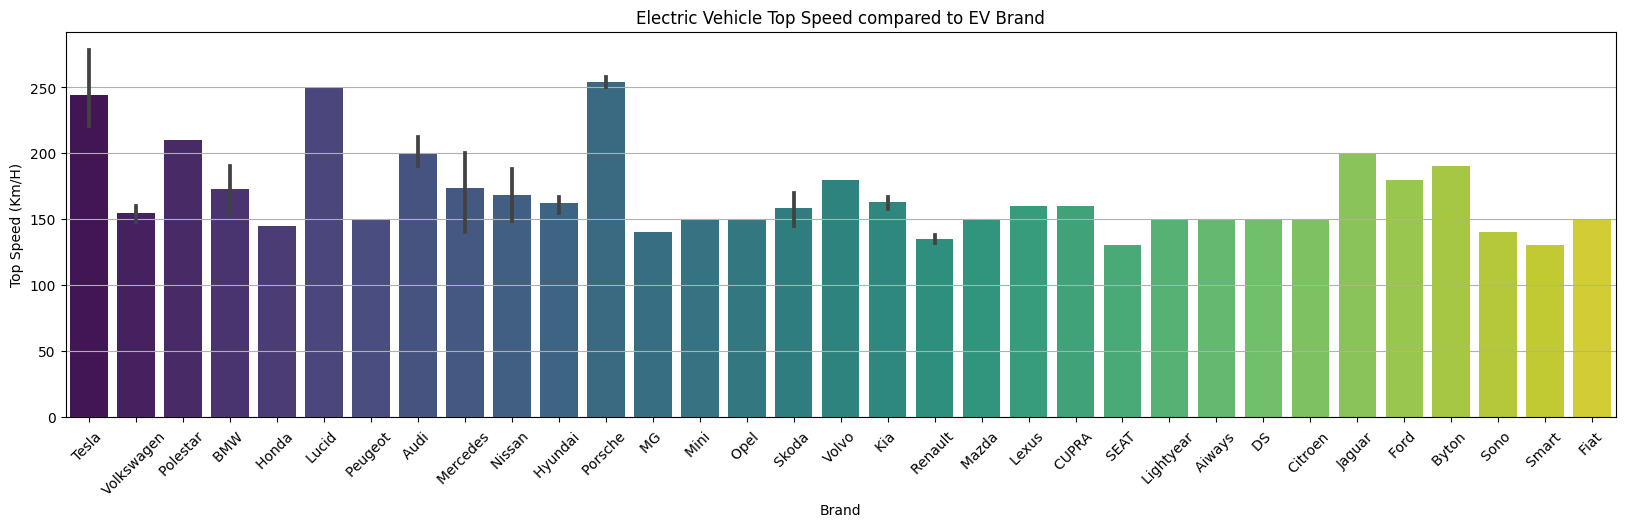

In [13]:
# Exploring Electric Vehicle Brands in Relation to Maximum Speed
# Create a figure with specified dimensions
figure = plt.figure(figsize=(20, 5))

# Generate a bar plot using seaborn, illustrating the connection between EV brands and top speeds, utilizing data from the 'ev' dataset, and employing a chosen color palette
sns.barplot(x='Brand', y='TopSpeed_KmH', data=ev, palette='viridis')

# Add gridlines along the y-axis
plt.grid(axis='y')

# Set the title of the plot
plt.title('Electric Vehicle Top Speed compared to EV Brand')

# Label the x and y axes
plt.xlabel('Brand')
plt.ylabel('Top Speed (Km/H)')

# Rotate x-axis labels for improved clarity
plt.xticks(rotation=45)


Tesla, Porsche, and Lucid exhibit the greatest speed, whereas Seat showcases the lowest speed.

# Model with Maximum Speed

In [14]:
speed_df = ev.sort_values(by=['TopSpeed_KmH'], ascending=False)
top_speed=speed_df[['Brand','Model','TopSpeed_KmH']].head(n=1)
top_speed

,Brand,Model,TopSpeed_KmH
51,Tesla,Roadster,410


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

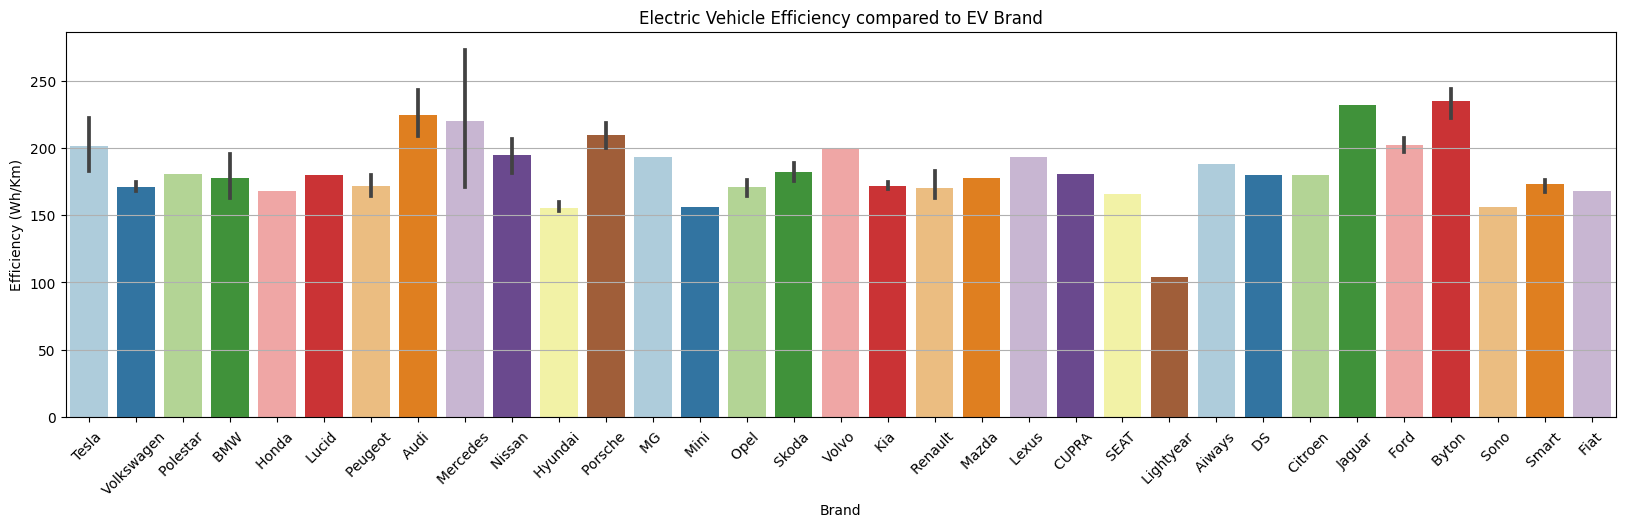

In [15]:
# Exploring Electric Vehicle Brands in terms of Efficiency
# Create a figure with specified dimensions
figure = plt.figure(figsize=(20, 5))

# Generate a bar plot using seaborn, illustrating the connection between EV brands and efficiency, utilizing data from the 'ev' dataset, and utilizing a chosen color palette
sns.barplot(x='Brand', y='Efficiency_WhKm', data=ev, palette='Paired')

# Introduce gridlines along the y-axis
plt.grid(axis='y')

# Set the title of the plot
plt.title('Electric Vehicle Efficiency compared to EV Brand')

# Label the x and y axes
plt.xlabel('Brand')
plt.ylabel('Efficiency (Wh/Km)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)


Mercedes, Audi, and Byton exhibit the greatest efficiency, while Lightyear showcases the lowest efficiency.

# Model with maximum Efficiency

In [16]:
eff_df = ev.sort_values(by=['Efficiency_WhKm'], ascending=False)
max_eff= eff_df[['Brand','Model','Efficiency_WhKm']].head(n=1)
max_eff

,Brand,Model,Efficiency_WhKm
84,Mercedes,EQV 300 Long,273


# Model with the highest Range & maximum seats

In [17]:
seat_df = ev.sort_values(by=['Seats'], ascending=False)
high_range_max_seats = seat_df[['Brand','Model','Range_Km', 'Seats']].head(n=1)
high_range_max_seats

,Brand,Model,Range_Km,Seats
21,Tesla,Model Y Long Range Dual Motor,425,7


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


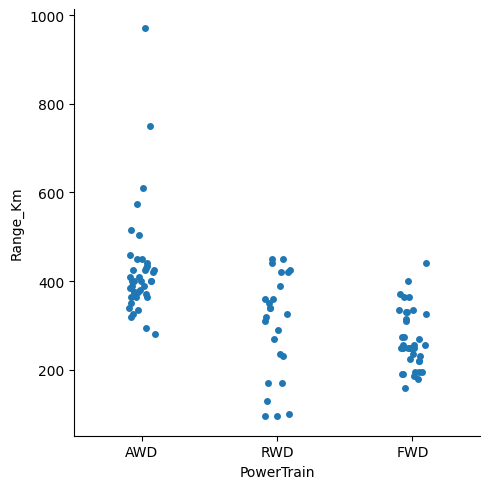

In [18]:
#Range Distribution across Different PowerTrains
fig, axs = plt.subplots(1, 2)
sns.catplot(x="PowerTrain", y="Range_Km", data=ev, ax=axs[0])
plt.close(1)


# 3. categorical data encoding

In [19]:
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [20]:
ev1 = ev[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]

In [21]:
# Display the contents of the 'ev1'
print(ev1)

# Create an ordinal encoder instance
encoder = OrdinalEncoder()

# Apply the encoding transformation to the data
result = encoder.fit_transform(ev1)

# Print the resulting transformed data
print(result)


           Brand                            Model PowerTrain RapidCharge  \
0         Tesla     Model 3 Long Range Dual Motor        AWD         Yes   
1    Volkswagen                         ID.3 Pure        RWD         Yes   
2      Polestar                                 2        AWD         Yes   
3           BMW                              iX3         RWD         Yes   
4         Honda                                e         RWD         Yes   
..           ...                              ...        ...         ...   
98       Nissan                       Ariya 63kWh        FWD         Yes   
99         Audi     e-tron S Sportback 55 quattro        AWD         Yes   
100      Nissan               Ariya e-4ORCE 63kWh        AWD         Yes   
101      Nissan   Ariya e-4ORCE 87kWh Performance        AWD         Yes   
102       Byton                 M-Byte 95 kWh 2WD        AWD         Yes   

       PlugType  BodyStyle Segment  
0    Type 2 CCS      Sedan       D  
1    Type 2 C

In [22]:
temp = ['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']

In [23]:
ev.drop(temp,axis=1,inplace=True)

In [24]:
result = pd.DataFrame(result)

In [25]:
result.columns=["Brand", "Model", "PowerTrain", 'RapidCharge', "PlugType", "BodyStyle", "Segment"]
result.index+=1

In [26]:
result

,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
99,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [27]:
ev1 = ev
ev1.index+=1

In [28]:
ev1[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']] = result[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]
ev

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,4.6,233,450,161,940,5,55480,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,10.0,160,270,167,250,5,30000,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,4.7,210,400,181,620,5,56440,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,6.8,180,360,206,560,5,68040,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.5,145,170,168,190,4,32997,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7.5,160,330,191,440,5,45000,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,4.5,210,335,258,540,5,96050,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,5.9,200,325,194,440,5,50000,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,5.1,200,375,232,450,5,65000,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [29]:
#correlation between different features
ev.corr()

<ipython-input-29-58f829103843>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ev.corr()


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174,0.062730,-0.050635,0.521011,-0.514820,-0.259657,-0.347164,-0.451568
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057,0.101759,0.067814,-0.560538,0.251054,-0.010110,0.339230,0.670403
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844,0.088316,-0.066035,-0.451495,0.401290,0.131297,0.227477,0.628597
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705,-0.195901,0.010976,-0.394721,0.105673,-0.028761,0.373146,0.623263
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920,0.089589,-0.018943,-0.278882,0.423111,-0.029570,0.342489,0.416744
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000,-0.036023,0.169003,-0.561584,0.197208,-0.000193,0.321713,0.737106
Brand,0.062730,0.101759,0.088316,-0.195901,0.089589,-0.036023,1.000000,-0.401572,0.056464,-0.188137,-0.231104,-0.275860,-0.002040
Model,-0.050635,0.067814,-0.066035,0.010976,-0.018943,0.169003,-0.401572,1.000000,-0.007609,0.144293,0.023750,0.261255,0.068414
PowerTrain,0.521011,-0.560538,-0.451495,-0.394721,-0.278882,-0.561584,0.056464,-0.007609,1.000000,-0.274797,-0.039763,-0.349484,-0.497850
RapidCharge,-0.514820,0.251054,0.401290,0.105673,0.423111,0.197208,-0.188137,0.144293,-0.274797,1.000000,0.539160,0.223577,0.189954


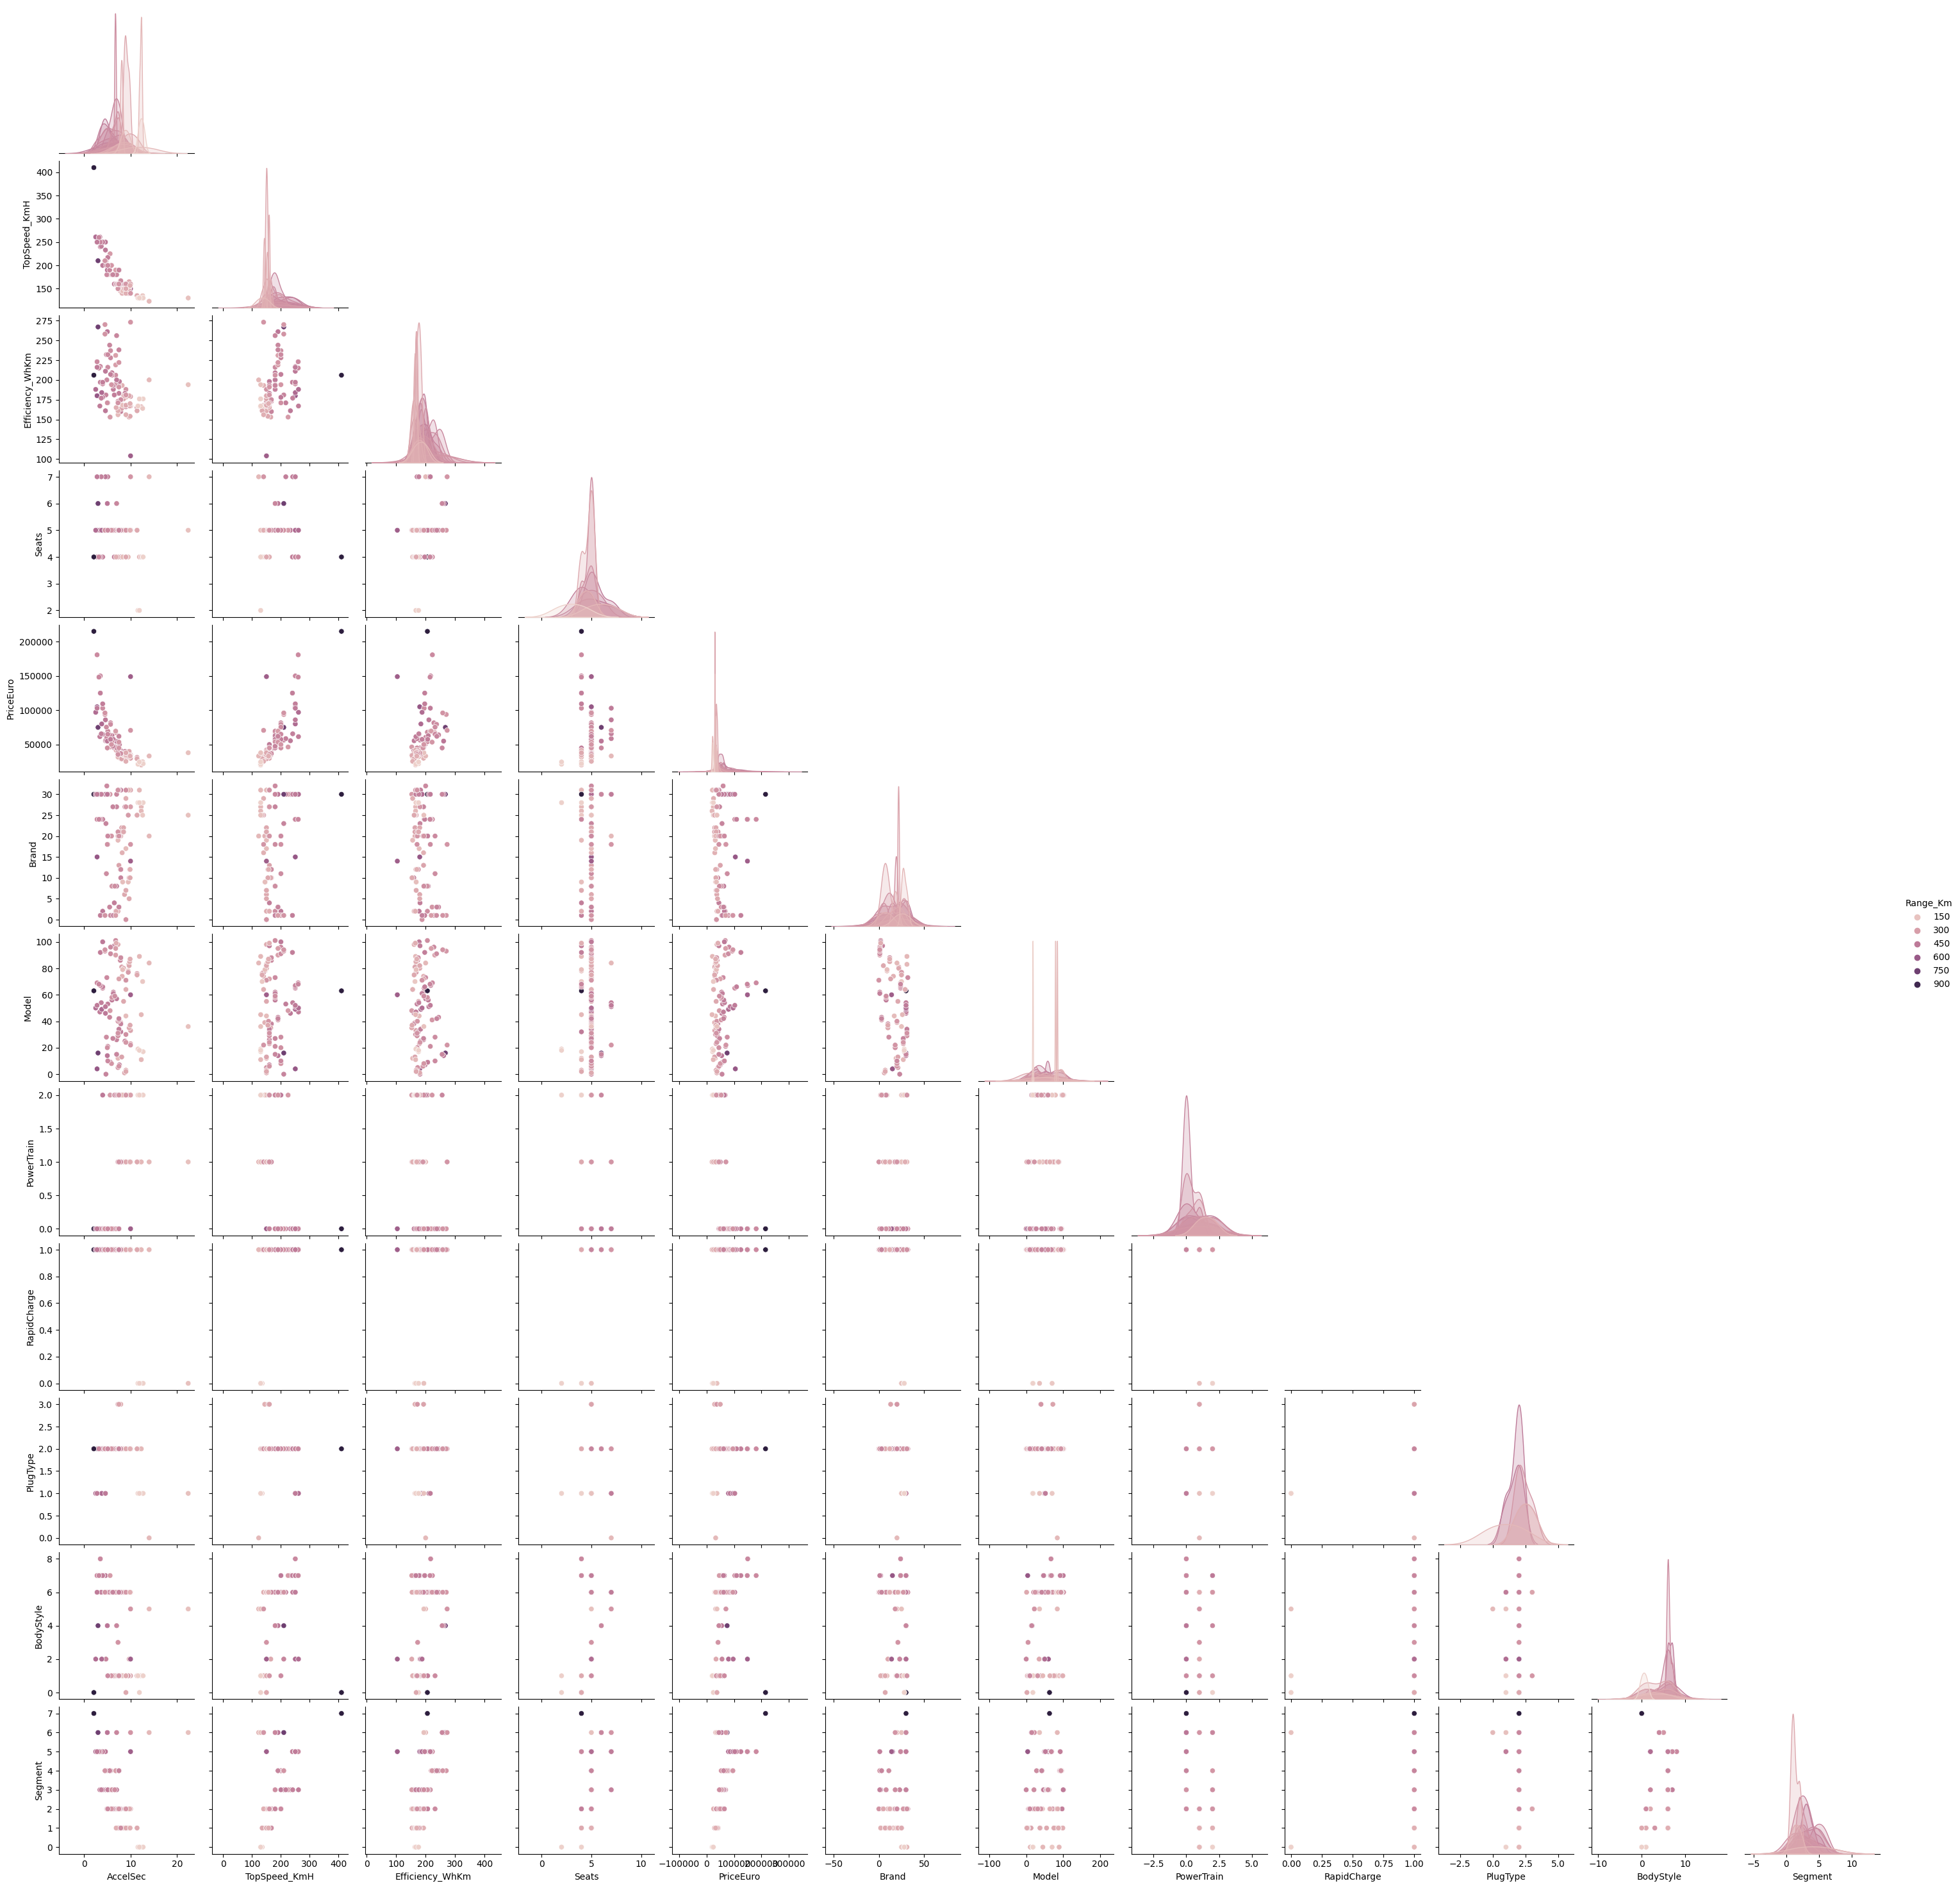

In [30]:
#Pairplot(gives the correlation of the data)
sns.pairplot(ev,
             corner = True,
             kind = 'scatter',
             hue = 'Range_Km')
plt.show()

<ipython-input-31-4f08f928386a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ev.corr(),linewidths=1,linecolor='white',annot=True)


<Axes: >

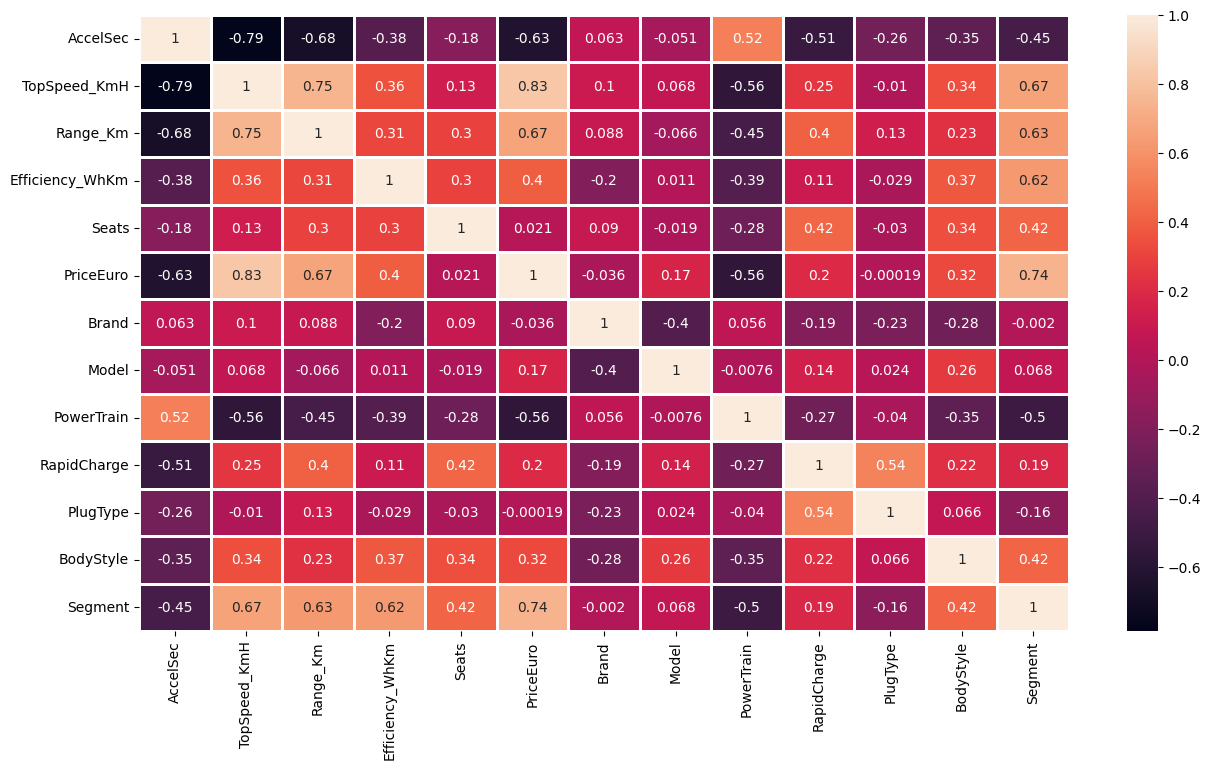

In [31]:
#Heatmap (gives the correlation of the data)
ax= plt.figure(figsize=(15,8))
sns.heatmap(ev.corr(),linewidths=1,linecolor='white',annot=True)

There exists a robust positive correlation between Electric Vehicle Range and the Top Speed per Kilometer of travel. It's possible that predicting Electric Vehicle Range first and subsequently determining the range in terms of Top Speed per Kilometer could suffice.

Furthermore, Electric Vehicle Range demonstrates a substantial negative correlation with Acceleration per second.

# 4. Feature Selection

In [32]:
#Define the target value(dependant variable) as y
X = ev['TopSpeed_KmH'].values.reshape(-1,1)
y = ev['Range_Km']

# 5. Using Linear Regression to Create a Model

In [33]:
#Splitting into Training and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
# Check Shape, Sample of Test Train Data
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)


X_train :  (82, 1)
X_test :  (21, 1)
y_train :  (82,)
y_test :  (21,)


In [35]:
# Create Linear Regression Model
lr = LinearRegression()

#Model Fitting
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
#We can output a prediction
y_pred = lr.predict(X_test)
y_pred[0:5]

array([359.60303889, 359.60303889, 292.8263226 , 493.15647147,
       381.86194432])

Let's assume we have information of following EV

- AccelSec: 5.8
- TopSpeed_KmH: 248
- Efficiency_WhKm: 200
- FastCharge_KmH: 400
- PowerTrain: AWD
- PlugType: Type 2 CCS
- BodyStyle: Hatchback
- Range_Km: ?
- Seats: 5

In [37]:
# We are going to predict the range of this given EV using linear regression model.

# TopSpeed_Kmh = 248

EV_pred = lr.predict([[248]])
print(EV_pred)

[488.70469038]


We predicted that the Range of this given sample EV is 488 km.

In [38]:
# Coefficient
lr.coef_

array([2.22589054])

In [39]:
# intercept
lr.intercept_

-63.3161642577993

Let's create a visualization that considers Range as a potential predictive factor for Top Speed.

(0.0, 1013.75)

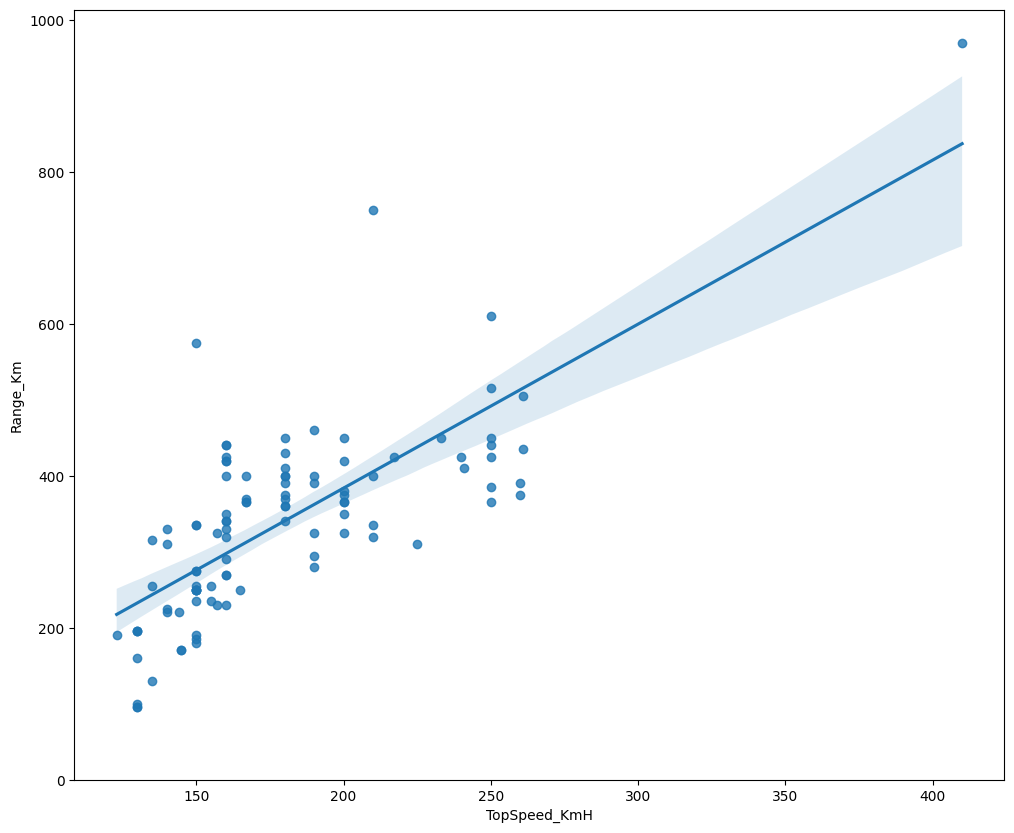

In [40]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="TopSpeed_KmH", y="Range_Km", data=ev)
plt.ylim(0,)

This plot reveals a positive correlation between range and Top Speed per Kilometer per hour (Kmh), as evident from the positive slope of the regression line. A positive slope indicates that as x (Top Speed) increases, y (Range) also increases, causing the function to ascend. Consequently, as the Top Speed increases, the Range also shows an increase.

The fitted values in a linear regression model represent the predicted values of the target variable based on the data employed to construct the model.
Now, let's examine the distribution of these fitted values produced by the model and compare it with the distribution of the real values.


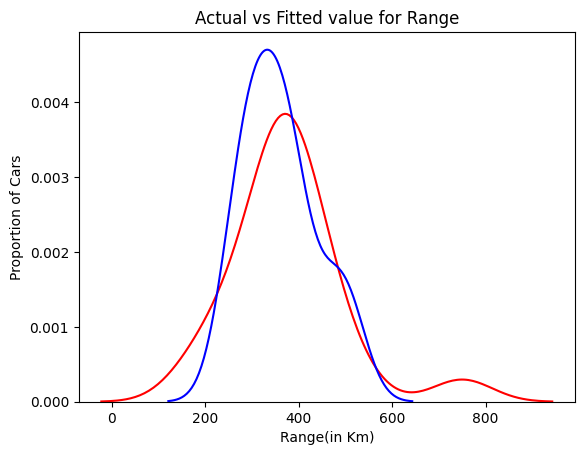

In [41]:
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted value for Range')
plt.xlabel('Range(in Km)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()



It's noticeable that the fitted values closely resemble the actual values, given the partial overlap between the two distributions. Nonetheless, there is indeed potential for enhancement.

# 6. Model Evaluation (Regression Metrics)

In [42]:
# Calculate the score for Training Data
lr.score(X_train, y_train)
print("R2 for Traing Data: ", lr.score(X_train, y_train))

R2 for Traing Data:  0.6297694922844455


In [43]:
# Calculate the score (R^2 for Regression) for Testing Data
lr.score(X_test, y_test)
print("R2 for Testing Data: ", lr.score(X_test, y_test))

R2 for Testing Data:  0.15363068038695216


In [44]:
#Calculate Mean Squared Error
mean_squared_error(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  11242.893676247608


In [45]:
#Calculate Mean Absolute Error(MAE)
mean_absolute_error(y_test, y_pred)
print("MAE: ",mean_absolute_error(y_test, y_pred))

MAE:  78.18137850937941


In [46]:
#Calculate Root Mean Squared Error(RMSE)

print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  106.03251235469057


# 7. Employ Forward Feature Selection to Select an Optimal Model

In [47]:
# Predictors
X = ev[['TopSpeed_KmH','Efficiency_WhKm','Segment','Seats','AccelSec','PriceEuro']]

In [48]:
# Target
y = ev['Range_Km']

In [49]:
# Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Construct a regression model utilizing Forward Feature Selection technique by iteratively incorporating each feature, one at a time. Continue this process until there are no further enhancements observed in the prediction metrics, which include R-squared (R2) and Adjusted R-squared (AdjustedR2) in this scenario.

In [50]:
# Set up the flag for displaying intermediate output
display_steps = True  # Toggle for testing/debugging
# display_steps = False  # Comment this line for no intermediate output

# Implement Forward Feature Selection for model selection

# Initialize with an empty set of predictors
selected_features = []
# Keep track of the best model and its parameters
best_model = {'feature': '', 'r2': 0, 'adjusted_r2': 0}
# Create a model instance to store modeling parameters
regression_model = LinearRegression()
# Obtain the count of instances in the training data
num_instances = X_train.shape[0]

r2_scores = []
adjusted_r2_scores = []

while True:
    change_detected = False

    if display_steps:
        print('')

    # List the features to be considered
    remaining_features = list(set(X.columns) - set(selected_features))

    if display_steps:
        print('(Step) Remaining Features = %s' % ', '.join(remaining_features))

    # Iterate through each remaining feature
    for new_feature in remaining_features:

        if display_steps:
            print('(Step) Evaluating %s...' % new_feature)
            print('(Step) - Current Features = %s' % ', '.join(selected_features + [new_feature]))

        # Fit the model using the training data
        model_fit = regression_model.fit(X_train[selected_features + [new_feature]], y_train)
        # Calculate the R-squared score for regression
        r2_score = model_fit.score(X_train[selected_features + [new_feature]], y_train)

        # Count of predictors in this model
        num_predictors = len(selected_features) + 1
        # Calculate the adjusted R-squared score
        adjusted_r2_score = 1 - ((1 - r2_score) * (num_instances - 1) / (num_instances - num_predictors - 1))

        if display_steps:
            print('(Step) - Adjusted R-squared: Current = %.3f; Best = %.3f' %
                  (adjusted_r2_score, best_model['adjusted_r2']))

        # Check if the model performance has improved
        if adjusted_r2_score > best_model['adjusted_r2']:
            # Update the best model parameters
            best_model = {'feature': new_feature, 'r2': r2_score, 'adjusted_r2': adjusted_r2_score}
            # Mark that a better model has been found
            change_detected = True
            if display_steps:
                print('(Step) - New Best Model: Feature = %s; R-squared = %.3f; Adjusted R-squared = %.3f' %
                      (best_model['feature'], best_model['r2'], best_model['adjusted_r2']))

    r2_scores.append(best_model['r2'])
    adjusted_r2_scores.append(best_model['adjusted_r2'])

    # If a better model was found after evaluating all remaining features
    if change_detected:
        # Update the selection details
        selected_features.append(best_model['feature'])
        remaining_features = list(set(remaining_features) - set([best_model['feature']]))
        print('Selected feature %-4s with R-squared = %.3f and adjusted R-squared = %.3f' %
              (best_model['feature'], best_model['r2'], best_model['adjusted_r2']))
    else:
        # Terminate if no better model was found
        print('*'*50)
        break

print('')
print('Selected features:')
print(', '.join(selected_features))



(Step) Remaining Features = Seats, Segment, TopSpeed_KmH, PriceEuro, Efficiency_WhKm, AccelSec
(Step) Evaluating Seats...
(Step) - Current Features = Seats
(Step) - Adjusted R-squared: Current = 0.055; Best = 0.000
(Step) - New Best Model: Feature = Seats; R-squared = 0.067; Adjusted R-squared = 0.055
(Step) Evaluating Segment...
(Step) - Current Features = Segment
(Step) - Adjusted R-squared: Current = 0.382; Best = 0.055
(Step) - New Best Model: Feature = Segment; R-squared = 0.390; Adjusted R-squared = 0.382
(Step) Evaluating TopSpeed_KmH...
(Step) - Current Features = TopSpeed_KmH
(Step) - Adjusted R-squared: Current = 0.625; Best = 0.382
(Step) - New Best Model: Feature = TopSpeed_KmH; R-squared = 0.630; Adjusted R-squared = 0.625
(Step) Evaluating PriceEuro...
(Step) - Current Features = PriceEuro
(Step) - Adjusted R-squared: Current = 0.549; Best = 0.625
(Step) Evaluating Efficiency_WhKm...
(Step) - Current Features = Efficiency_WhKm
(Step) - Adjusted R-squared: Current = 0.064

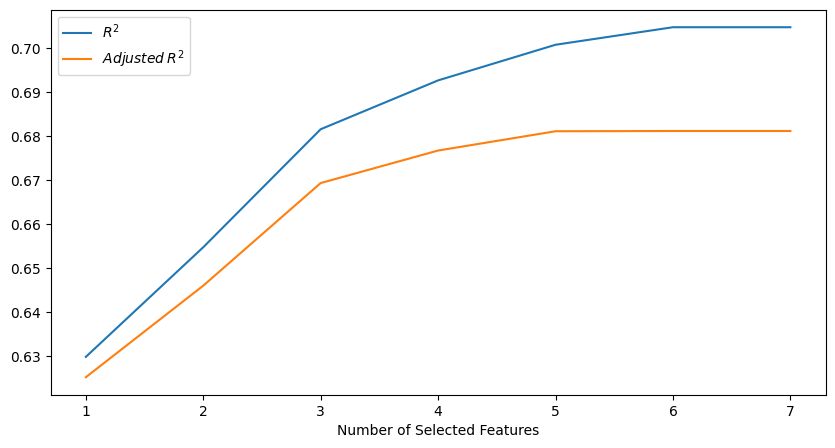

In [51]:
# Present both R-squared and Adjusted R-squared scores

iteration_range = range(1, len(r2_scores) + 1)

# specify the size of the chart
plt.figure(figsize=(10, 5))
# plot each performance metric
plt.plot(iteration_range, r2_scores, label='$R^2$')
plt.plot(iteration_range, adjusted_r2_scores , label='$Adjusted \: R^2$')
# enhance visualization
plt.xlabel('Number of Selected Features')
plt.legend()
# display the chart
plt.show()


I can improve the R-squared value by opting for different features. Whenever we integrate an independent variable into the model, there is a tendency for the R-squared value to increase.

# 8. Regularisation

Linear regression operates by choosing coefficients for each independent variable in a way that minimizes a loss function. Nevertheless, excessive coefficients can result in the model overfitting to the training dataset.

The two most common types of regularization are the Ridge and Lasso.

In [52]:
#Create a Base Model Using Linear Regression
model = LinearRegression()
# Fit
model.fit(X,y)

LinearRegression()

In [53]:
# Check Coefficient
model.coef_

array([ 7.47717179e-01, -6.22509843e-01,  1.65787415e+01,  2.57670219e+01,
       -1.24305613e+01,  6.04144393e-04])

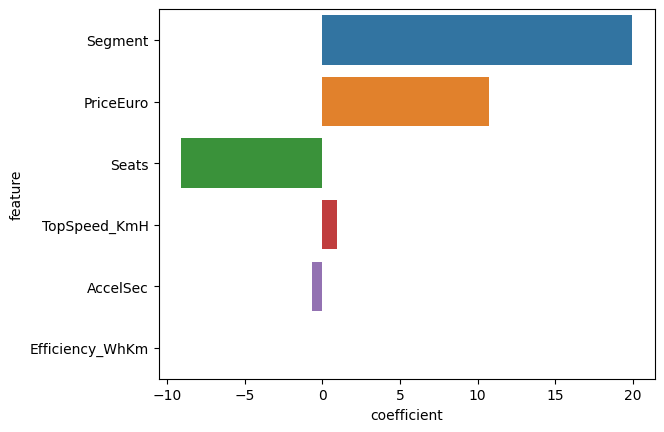

In [54]:
def visualize_coefficients(features, regression_model):
    coefficients_df = pd.DataFrame({'feature': features.columns,
                                    'coefficient': regression_model.coef_,
                                    'absolute_coefficient': np.abs(regression_model.coef_)})
    coefficients_df.sort_values('absolute_coefficient', inplace=True, ascending=False)
    sns.barplot(x="coefficient", y="feature", data=coefficients_df)

# Display Coefficients
visualize_coefficients(X, regression_model)


# 9. Ridge Regression model

In [55]:
# Implement Ridge Regression model

# Create an instance for modeling with the required parameters
ridge_model = Ridge()

# Maintain records of interim coefficient values and errors
coeff_values = []
error_values = []

# Generate a series of alphas for computation
ridge_alphas = np.logspace(-6, 6, 200)  # 'lambda' as mentioned in the slides

# Train the model using varying degrees of regularization
for alpha_value in ridge_alphas:
    ridge_model.set_params(alpha=alpha_value)
    ridge_model.fit(X, y)
    coeff_values.append(ridge_model.coef_)
    error_values.append(mean_squared_error(ridge_model.coef_, regression_model.coef_))


Visual Representation of Coefficient of Ridge Model

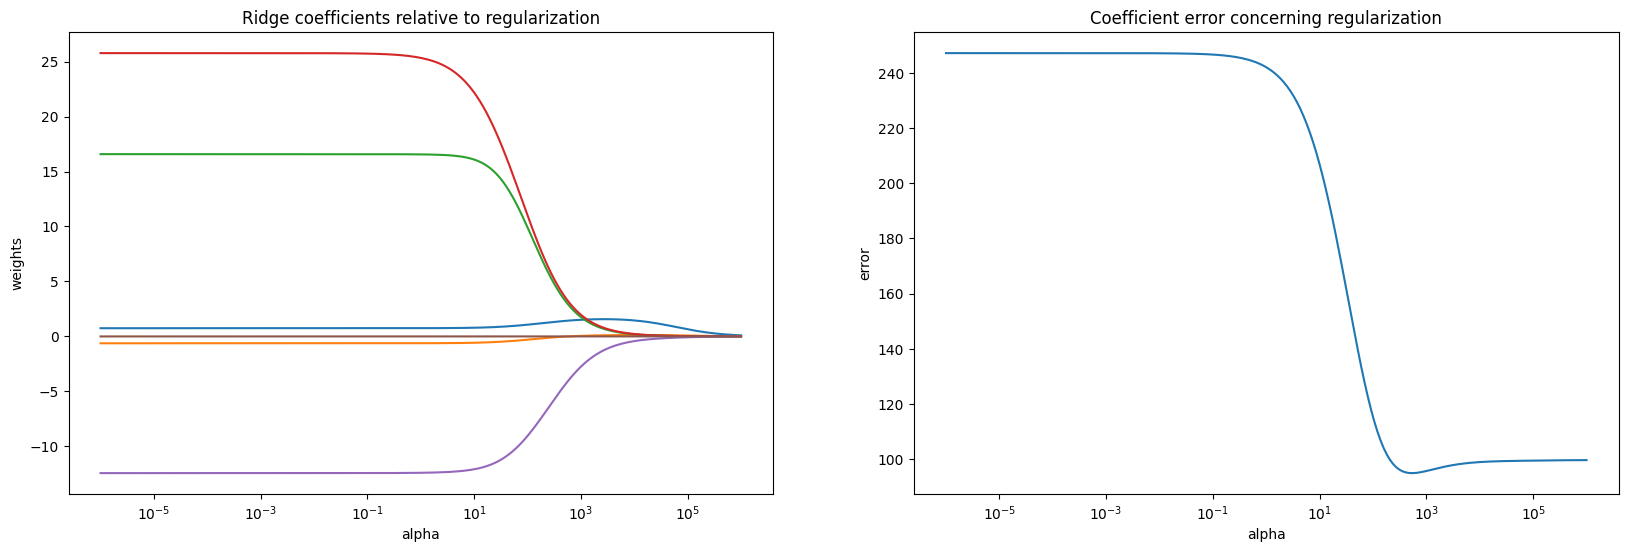

In [56]:
# Display outcomes
plt.figure(figsize=(20, 6))

plt.subplot(121)
coeff_plot = plt.gca()
coeff_plot.plot(ridge_alphas, coeff_values)
coeff_plot.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients relative to regularization')
plt.axis('tight')

plt.subplot(122)
error_plot = plt.gca()
error_plot.plot(ridge_alphas, error_values)
error_plot.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error concerning regularization')
plt.axis('tight')

plt.show()


Find an optimal value for Ridge regression alpha using RidgeCV

In [57]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 19.791668678535572
Score: 0.6467904685229368


In [58]:
optimal_ridge.coef_

array([ 8.33733337e-01, -5.29343039e-01,  1.53156424e+01,  1.97312130e+01,
       -1.16862263e+01,  5.71635752e-04])

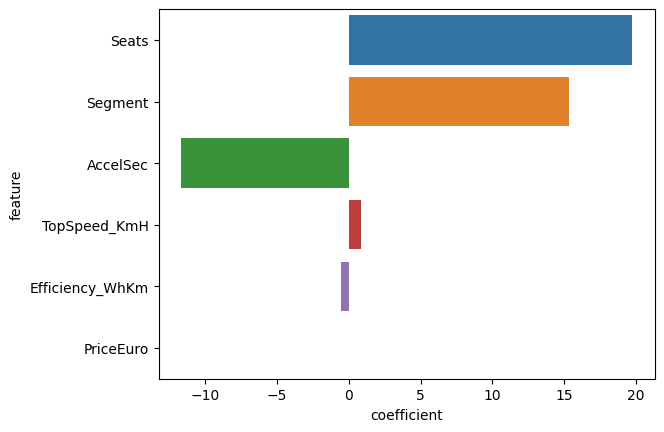

In [60]:
# Plot Coefficient
visualize_coefficients(X, optimal_ridge)

In [61]:
from sklearn.metrics import r2_score as r2_score_metric

ridge_regression = Ridge(alpha=0.01)
ridge_regression.fit(X_train, y_train)
predictions_train = ridge_regression.predict(X_train)
print("Root Mean Squared Error (Train):", np.sqrt(mean_squared_error(y_train, predictions_train)))
print("R-squared (Train):", r2_score_metric(y_train, predictions_train))

predictions_test = ridge_regression.predict(X_test)
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(y_test, predictions_test)))
print("R-squared (Test):", r2_score_metric(y_test, predictions_test))



Root Mean Squared Error (Train): 68.50082915686325
R-squared (Train): 0.7047900146524513
Root Mean Squared Error (Test): 98.54263271897918
R-squared (Test): 0.26897853326748533


The results shown above suggest that the Ridge Regression model produces a Root Mean Squared Error (RMSE) of 68.5 and an R-squared score of 70.48% on the training data. For the test data, these measurements are 98.54 for RMSE and an R-squared value of 26.9%.

# 10. Lasso Regression model

In [62]:
# Implement Lasso Regression model

# Create a model instance to store modeling parameters
lasso_model = Lasso()

# Maintain records of interim coefficient values and errors
coeff_values = []
error_values = []

# Generate a series of alphas for computation
lasso_alphas = np.logspace(-6, 6, 200)  # 'lambda' as mentioned in the slides

# Train the model using varying degrees of regularization
for alpha_value in lasso_alphas:
    lasso_model.set_params(alpha=alpha_value)
    lasso_model.fit(X, y)
    coeff_values.append(lasso_model.coef_)
    error_values.append(mean_squared_error(lasso_model.coef_, regression_model.coef_))


Visual Representation of Coefficient of Lasso Model

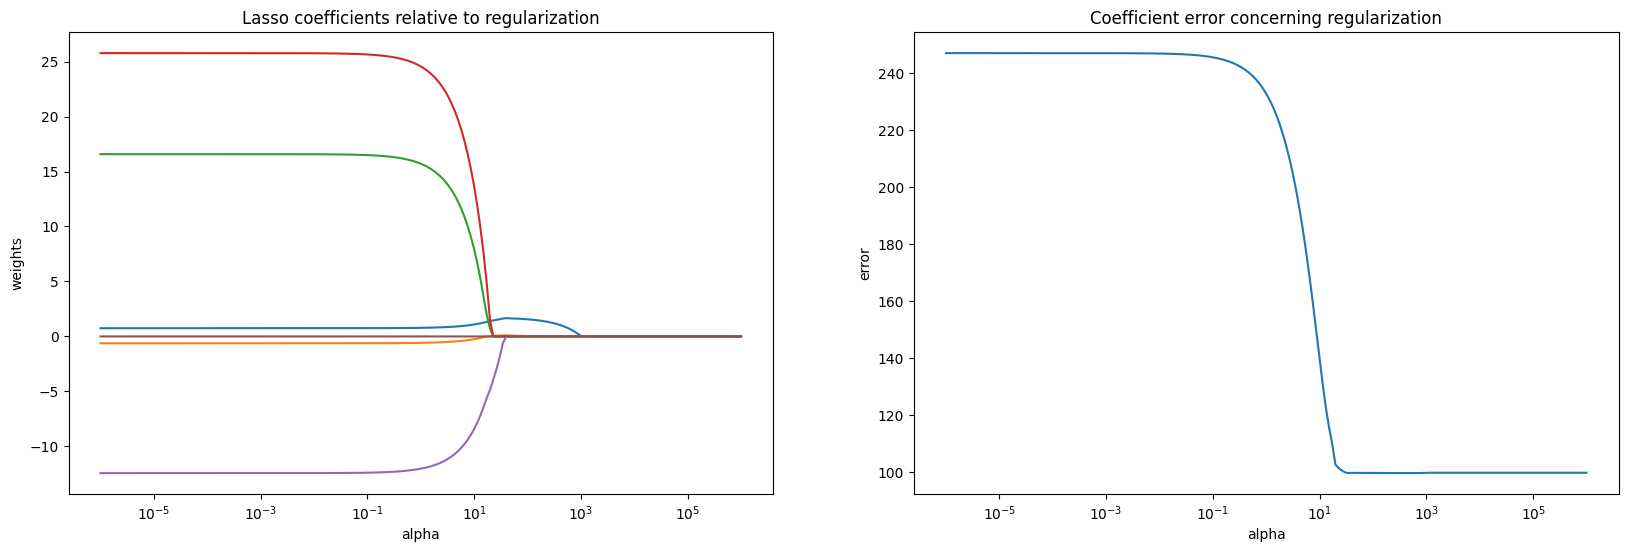

In [63]:
# Display outcomes
plt.figure(figsize=(20, 6))

plt.subplot(121)
coeff_plot = plt.gca()
coeff_plot.plot(lasso_alphas, coeff_values)
coeff_plot.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients relative to regularization')
plt.axis('tight')

plt.subplot(122)
error_plot = plt.gca()
error_plot.plot(lasso_alphas, error_values)
error_plot.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error concerning regularization')
plt.axis('tight')

plt.show()


Find an optimal value for Lasso regression alpha using LassoCV.

In [64]:
# Identify Optimal Lasso with LassoCV

# Create a model instance to store modeling parameters
optimal_lasso_model = LassoCV(alphas=lasso_alphas, cv=10)

optimal_lasso_model.fit(X, y)
print('Optimal Alpha:', optimal_lasso_model.alpha_)
print('Optimal Score:', optimal_lasso_model.score(X, y))


Optimal Alpha: 482.41087041653736
Optimal Score: 0.5423596191706892


In [65]:
optimal_lasso_model.coef_

array([ 0.91176137,  0.        ,  0.        ,  0.        , -0.        ,
        0.00152598])

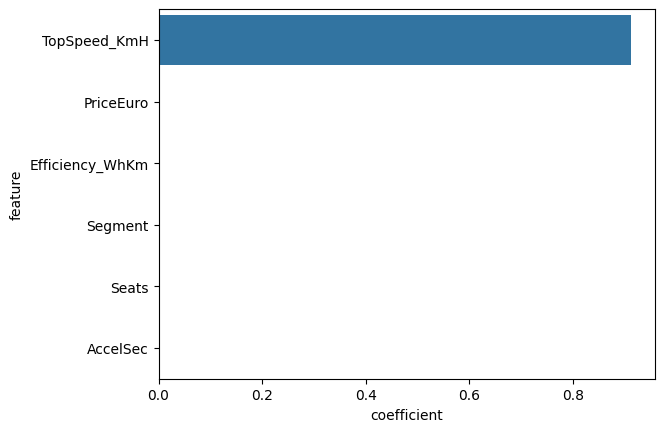

In [67]:
# Plot Coefficient
visualize_coefficients(X, optimal_lasso_model)

In [68]:
from sklearn.metrics import r2_score as r2_score_metric

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)
pred_train_lasso = model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train_lasso)))
print(r2_score_metric(y_train, pred_train_lasso))

pred_test_lasso = model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test_lasso)))
print(r2_score_metric(y_test, pred_test_lasso))


68.5008306844336
0.7047900014860699
98.54843710334595
0.26889241308942313


The displayed results above showcase the outcomes of the Lasso Regression model. For the training data, the Root Mean Squared Error (RMSE) is 68.5, and the R-squared value is 70.5%. In terms of the test data, the RMSE is 98.5, and the R-squared value is 26.89%. Notably, Lasso Regression also serves as a technique for feature selection, as it zeroes out coefficients associated with less impactful features.

Compare the residuals for the Ridge and Lasso visually.

In [69]:
# Ridge model residuals
optimal_ridge.fit(X_train, y_train)
prediction = optimal_ridge.predict(X_test)
residual_ridge = (y_test - prediction)
print(residual_ridge)

31     -80.653722
68     120.792391
63     135.718933
48    -117.533883
43     -14.067880
41      67.909563
91    -100.717517
46      72.637466
11      15.012017
1       57.864079
19     -32.057118
32      75.420670
98     -14.274991
86     -21.932045
77      72.053241
5      -93.644847
80    -173.389035
34     358.472251
13     100.226171
27      70.433793
101    -21.412395
Name: Range_Km, dtype: float64


In [70]:
# Lasso model residuals
optimal_lasso_model.fit(X_train, y_train)
prediction = optimal_lasso_model.predict(X_test)
residual_lasso = (y_test - prediction)
print(residual_lasso)

31     -83.715045
68     113.593859
63     136.640227
48    -120.645532
43     -15.731764
41      61.505778
91    -104.779162
46      71.666541
11      15.321647
1       51.259567
19     -31.318471
32      74.890551
98     -19.305206
86     -20.195942
77      72.106718
5      -91.523348
80    -171.186623
34     351.552557
13     101.122874
27      70.450825
101    -26.417441
Name: Range_Km, dtype: float64


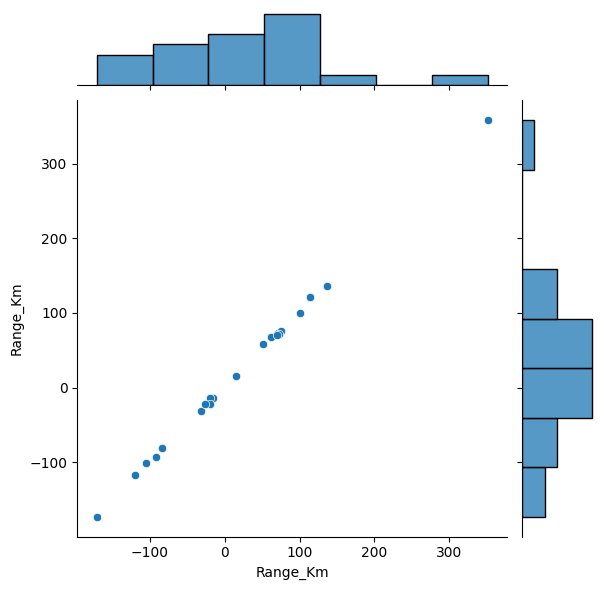

In [71]:
# Jointplot

sns.jointplot(data=ev, x=residual_lasso, y=residual_ridge, kind = 'scatter')


# Conclusions

Based on my examination, the influencing factors on the EV range include characteristics like TopSpeed_KmH, Efficiency_WhKm, AccelSec, Segment, Seats, and PriceEuro.

Several other elements also play a role in affecting the EV range:

- Your personal driving habits
- Terrain and the condition of the road
- Weather conditions
- The weight of the vehicle
- Usage of heating and air conditioning systems
- State of the tires
- Battery condition